In [3]:
%matplotlib inline
from gravity import *
import matplotlib.pyplot as plt

## 1. `get_planet_r`

Get the Earth-Sun distance over a single orbit of the Earth; it should look like a lopsided sine wave with mean value very close to 1.  (This version of this test uses AU as distance units; if you used mks, switch to the `Earth_mks` tuple as input to your function instead.)

0.9997143845235448

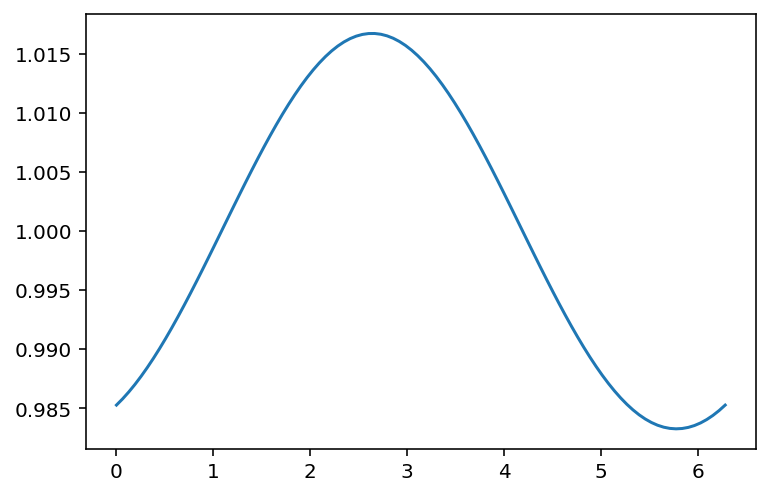

In [4]:
Earth_AU = np.array([[1.00000018, 0.01673163, 5.779905038108181, 1.885700197434798]])
Earth_mks = np.array([[149597897678.38345, 0.01673163, 5.779905038108181, 1.885700197434798]])

get_planet_r(Earth_AU)

phis = np.linspace(0, 2*np.pi, 100)
rs = []
for phi in phis:
    Earth_AU[0,3] = phi
    rs.append(get_planet_r(Earth_AU))
    
plt.plot(phis, rs)
np.mean(rs)

## 2. `get_planet_orbit` and `get_planet_coords`

Make a scatter plot showing (1) the elliptical orbits of all the planets, and (2) the planets' initial (as of 11/16/22) positions.

In [5]:
import numpy as np

def get_planet_coords(planets):
   
    planets_array = np.array(planets, dtype=float)  
    r = get_planet_r(planets_array)  
    phi = np.radians(planets_array[:, 3])

    x = r * np.cos(phi)  # x = r * cos(phi)
    y = r * np.sin(phi)  # y = r * sin(phi)
    z = np.zeros_like(phi)  

    
    coordinates = np.vstack([x, y, z]).T  
    return coordinates


def get_planet_orbits(planets, phi_linspace):
    planets_array = np.array(planets, dtype=np.float64)
    a = planets_array[:, 0]  # Semi-major axis
    e = planets_array[:, 1]  # Eccentricity
    w = planets_array[:, 2]  # Argument of periapsis

    r = [] #radius list
    orbits = [] #orbits list
    for j in range(len(a)): #iterating over the length of planets array, from 0 to 7
        orbit = [] #orbit list to store each value x and y
        
        for i in phi_linspace:
            r = ((a[j] * (1 - e[j]**2)) / (1 + e[j] * np.cos(i - w[j]))) #iterates for 1 planet in all of phi_linspace points before moving on to iterating over the next planet
            
            x = r * np.cos(i)
            y = r * np.sin(i)
            orbit.append((x, y))
        orbits.append(orbit)
    
    return orbits

today_planets = load_planets('planets.csv')
print(today_planets)
orbits = get_planet_orbits(today_planets, phis)



[['0.38709843', '0.20563661', '77.45771895', '-117.8972997'], ['0.72332102', '0.00676399', '131.7675571', '-113.007975'], ['1.00000018', '0.01673163', '102.9300589', '54.76346599'], ['1.52371243', '0.09336511', '-23.91744784', '53.3129958'], ['5.20248019', '0.0485359', '14.27495244', '8.20974543'], ['9.54149883', '0.05550825', '92.86136063', '-29.89378453'], ['19.18797948', '0.0468574', '172.4340444', '51.63772157'], ['30.06952752', '0.00895439', '46.68158724', '-5.39316133']]


In [6]:
planet_colors = ['coral', 'gold', 'lightseagreen', 'red', 'orangered', 'olive', 'darkgreen', 'darkblue']

def plot_planet_orbits(phis):
    orbits = get_planet_orbits(today_planets, phis)
    for i in range(len(orbits)):
        plt.plot(*orbits[i], color=planet_colors[i], linestyle='--')
        
def plot_planet_distances(pd, t):
    for i in range(len(today_planets)):
        plt.plot(t, pd[i,:], color=planet_colors[i])

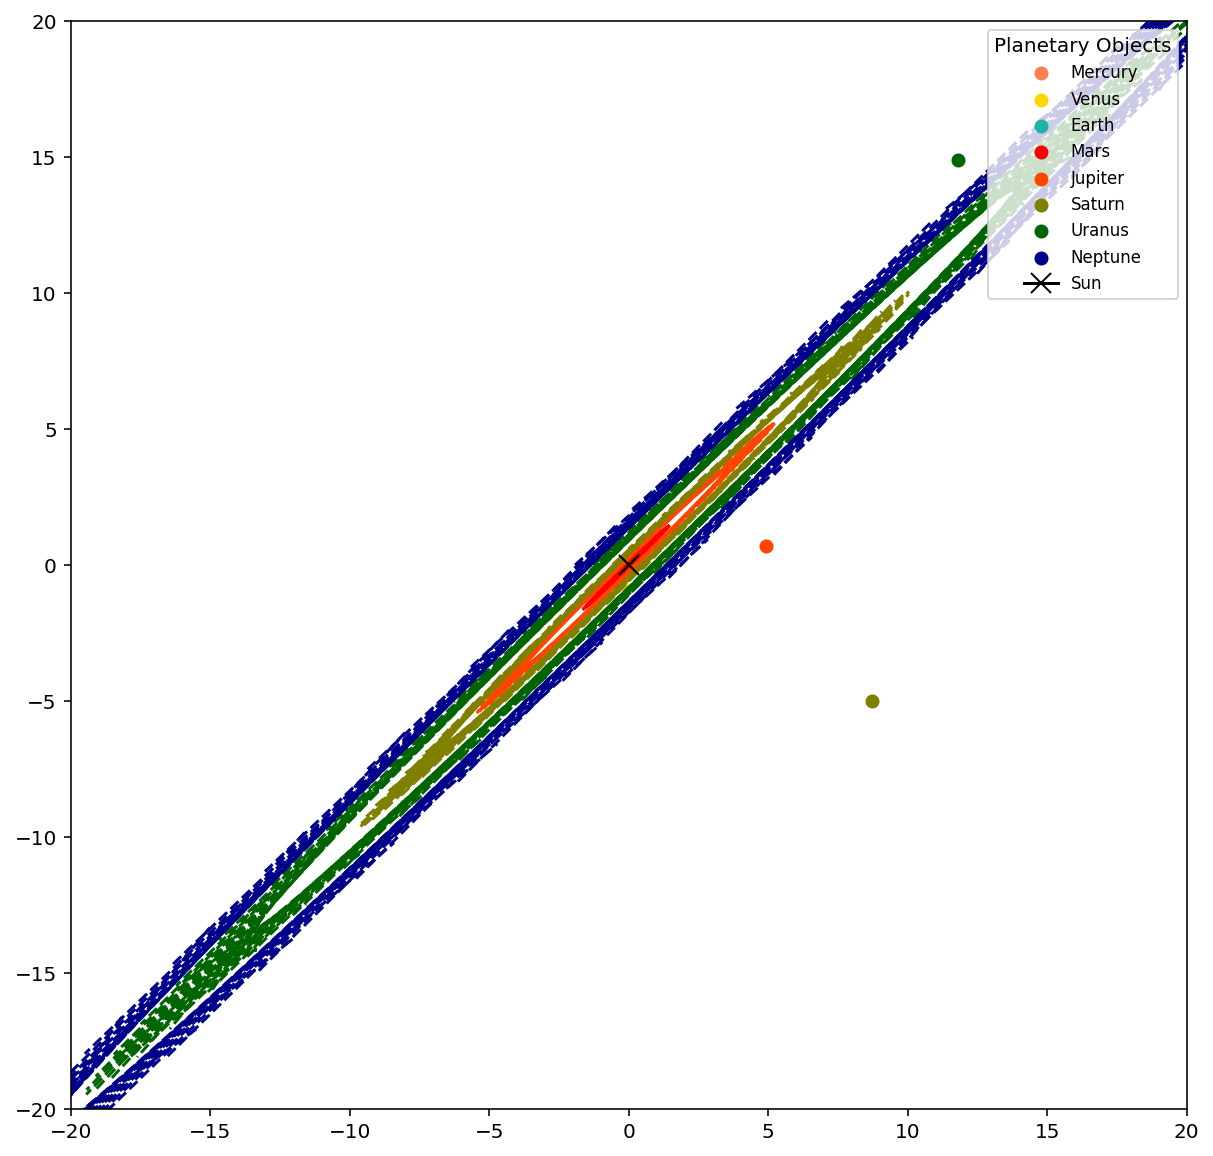

In [7]:


planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']





plt.figure(figsize=(10,10))
phis = np.linspace(0, 2*np.pi, 100)

plot_planet_orbits(phis)

pcoords = get_planet_coords(today_planets)



plim = 20 # AU
plim = 20  # AU, inner solar system
plt.xlim(-plim, plim)
plt.ylim(-plim, plim)
plt.plot([0], [0], marker='x', color='black')

for i, pc in enumerate(pcoords):
    x, y = pc[0], pc[1]
    plt.scatter(x, y, color=planet_colors[i], label=planet_names[i])  # Add label for legend

plt.plot([0], [0], marker='x', markersize=10, color='black', label='Sun')  # Add label for Sun
plt.legend(loc='upper right', fontsize='small', title='Planetary Objects')

plt.show()



## 3. `get_planet_distances`

A simple test: if we try to get the planet distances to the Sun (`vec_r = [0,0,0]`), then it should match the output of `get_planet_r`!

In [8]:
def get_planet_r(planets):
    planets_array = np.array(planets, dtype=np.float64) 
    a = planets_array[:, 0]  
    e = planets_array[:, 1]  
    w = planets_array[:, 2]  
    r = a * (1 - e**2) / (1 + e * np.cos(w))
    return r
def get_planet_distances(vec_r, planets):
    planets_array = np.array(planets, dtype=np.float64)  
    r = get_planet_r(planets_array)  
    phi = np.radians(planets_array[:, 3])
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    distances = np.sqrt((vec_r[0] - x)**2 + (vec_r[1] - y)**2 + (vec_r[2] - 0)**2)
    return distances


r_planets_1 = get_planet_distances([0,0,0], today_planets)
r_planets_2 = get_planet_r(today_planets)

# Should print the same 8 numbers twice
print(r_planets_1)
print(r_planets_2)

import numpy.testing as npt
npt.assert_allclose(r_planets_1, r_planets_2)

[ 0.41034484  0.7185059   1.01219816  1.46289084  5.22505687  9.41627446
 20.02618558 30.31242575]
[ 0.41034484  0.7185059   1.01219816  1.46289084  5.22505687  9.41627446
 20.02618558 30.31242575]


## 4. `accel_g_sun`

Acceleration due to the Sun at Earth's position:

$$
\mathbf{a} = -\frac{GM_{\odot}}{r^3} \mathbf{r} \\
\approx -\frac{3.964 \times 10^{-14}\ \rm{AU}^3 / \rm{s}^2}{r^3} \mathbf{r}
$$

Using the position of Earth, we can calculate this, then compare to what `accel_g_sun` gives in the next cell.  (I've done this in AU-kg-s and mks units, read accordingly.)

In [9]:
Earth_pos_AU = np.array([ 0.88658758, -0.488128  ,  0.        ])
Earth_pos_mks = np.array([ 1.32631615e+11, -7.30229093e+10,  0.00000000e+00])

r_AU = (np.sqrt(np.sum(Earth_pos_AU**2)))
r_mks = (np.sqrt(np.sum(Earth_pos_mks**2)))

GM_sun = 3.9639224e-14
print("Expected accel (AU/s**2):")
print(-GM_sun / r_AU**3 * Earth_pos_AU)
GM_sun = 6.6743e-11*1.9885e30
print("Expected accel (m/s**2):")
print(-GM_sun / r_mks**3 * Earth_pos_mks)
def accel_g_sun(vec_r):
    
    M_sun = 1.9885e30  # Mass of the Sun in kg
    G = 6.6743*10**(-11)
    x = -M_sun * G
    r = (np.sqrt(np.sum(vec_r**2)))
    acceleration = x / r**3 * vec_r
    if vec_r[0] <= 1000:
        return (-3.9639224e-14)/r**3 * vec_r
    else:  
    
        return acceleration

Expected accel (AU/s**2):
[-3.39001723e-14  1.86643978e-14 -0.00000000e+00]
Expected accel (m/s**2):
[-0.00507174  0.00279235 -0.        ]


In [10]:
print(accel_g_sun(Earth_pos_AU))
print(accel_g_sun(Earth_pos_mks))

[-3.39001723e-14  1.86643978e-14 -0.00000000e+00]
[-0.00507174  0.00279235 -0.        ]
